In [1]:
import pandas as pd # 데이터 전처리
import numpy as np # 데이터 전처리
import matplotlib.pyplot as plt # 데이터 시각화

from datetime import datetime, timedelta # 시간 데이터 처리
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델
%matplotlib inline

In [2]:
train = pd.read_csv("D:/workspace/DACON_2019/DACON_DATASET/train.csv")
train['Time'] = pd.to_datetime(train['Time']) 
train = train.set_index('Time')

In [3]:
train # 16909 row * 1292 col

,X692,X1272,X553,X1299,X4,X598,X1003,X1010,X1216,X1047,...,X1164,X656,X1287,X324,X767,X1271,X1288,X58,X1033,X1163
Time,,,,,,,,,,,,,,,,,,,,,
2016-07-26 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-30 19:00:00,0.271,0.754,0.327,0.468,NaN,0.314,0.769,0.790,0.558,0.149,...,0.523,0.455,0.295,0.056,0.295,2.089,0.619,1.063,0.345,0.565
2018-06-30 20:00:00,0.341,0.827,0.478,0.356,NaN,0.434,0.680,0.819,0.470,0.160,...,0.350,0.799,0.287,0.057,0.548,2.168,0.723,4.760,0.388,0.620
2018-06-30 21:00:00,0.535,0.516,0.558,0.496,NaN,0.479,0.590,0.910,0.424,0.468,...,0.446,0.754,0.433,0.060,0.677,2.028,0.766,5.386,0.440,0.573


In [4]:
train=train.dropna(how='all', axis=1) # 모든 열이 NaN이면 지워버림. col 8개 제거
train.to_csv('D:/workspace/DACON_2019/SUHYUN/train_revise.csv', index=True)
train.head()

,X692,X1272,X553,X1299,X598,X1003,X1010,X1216,X1047,X381,...,X1164,X656,X1287,X324,X767,X1271,X1288,X58,X1033,X1163
Time,,,,,,,,,,,,,,,,,,,,,
2016-07-26 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
r = train.rolling(window=720, min_periods=1) # 데이터가 1개라도 존재하면 평균을 내고 싶을 떄, min_period기능을 사용
# 24시간*30일 = 720
r_mean=r.mean()
r_mean

,X692,X1272,X553,X1299,X598,X1003,X1010,X1216,X1047,X381,...,X1164,X656,X1287,X324,X767,X1271,X1288,X58,X1033,X1163
Time,,,,,,,,,,,,,,,,,,,,,
2016-07-26 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0EA881688>,
      dtype=object)

<Figure size 2160x7200 with 0 Axes>

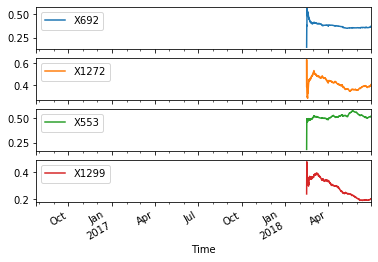

In [67]:
f = plt.figure(figsize=(30,100))
r_mean[['X692', 'X1272', 'X553', 'X1299']].plot(subplots=True)

In [74]:
r_mean[['X692', 'X1272', 'X553', 'X1299']].dropna() # 3264 row 개수 확인

,X692,X1272,X553,X1299
Time,,,,
2018-02-15 00:00:00,0.150000,0.392000,0.181000,0.237000
2018-02-15 01:00:00,0.286000,0.632500,0.341500,0.296500
2018-02-15 02:00:00,0.295333,0.568333,0.381333,0.300333
2018-02-15 03:00:00,0.298750,0.499250,0.417000,0.295000
2018-02-15 04:00:00,0.304400,0.459000,0.430800,0.308800
2018-02-15 05:00:00,0.304167,0.424833,0.444667,0.416167
2018-02-15 06:00:00,0.299714,0.405571,0.450571,0.434857
2018-02-15 07:00:00,0.362000,0.402000,0.457500,0.447750
2018-02-15 08:00:00,0.377000,0.384778,0.486778,0.456778


In [85]:
r_mean.dropna(how='all', axis=)

,X692,X1272,X553,X1299,X598,X1003,X1010,X1216,X1047,X381,...,X1164,X656,X1287,X324,X767,X1271,X1288,X58,X1033,X1163
Time,,,,,,,,,,,,,,,,,,,,,
2016-07-26 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-26 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
